In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [6]:
#  n  measurements (rows) and  3  variables (columns)
n = 1000
x1 = np.random.normal(loc=0, scale=1, size=n)
x2 = x1 + np.random.normal(loc=0, scale=3, size=n)
x3 = x1*2 + x2
X = np.array([x1,x2,x3]).T 
print("X\n",X)

#Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.cov(X,rowvar=False)
print("cov\n", cov)
l, V = la.eig(cov)
l = np.real_if_close(l)

# perform the SVD
U, S, Vt = np.linalg.svd(X)
#eigenvalues are the values of S to the power of 2, divided by n-1. We can use this formula since data matrix has zero mean
l_svd = S**2/(n-1) 
eigv_svd = Vt.T 
#NB: eigv_svd has already the columns as eigenvectors (it has not to be transposed)

#Show both the results
print("\nEIGENDECOMPOSITION\neigenvalues:\n", l, "\neigenvectors:\n", V)
print("\nSVD\neigenvalues:\n", l_svd, "\neigenvectors:\n", eigv_svd)

#maybe the eigenvectors aren't in the same order -> we sort the matrix with eigenvectors according to the corresponded eigenvalues
#but first of all we sort the eigenvalues from the smallest to the highest
print("\nWe sort the matrix with eigenvectors according to the corresponded eigenvalues from the smallest to the highest")
sorted_index_l = np.argsort(l)
sorted_index_l_svd = np.argsort(l_svd)
l_sorted = np.copy(l)
V_sorted = np.copy(V)
l_svd_sorted = np.copy(l_svd)
eigv_svd_sorted = np.copy(eigv_svd)

for j in range(3):    
    l_sorted[j] = l[sorted_index_l[j]]
    l_svd_sorted[j] = l_svd[sorted_index_l_svd[j]]
    for i in range(3):
        V_sorted[i,j] = V[i,sorted_index_l[j]]
        eigv_svd_sorted[i,j] = eigv_svd[i,sorted_index_l_svd[j]]

print("\nEIGENDECOMPOSITION\neigenvalues:\n", l_sorted, "\neigenvectors:\n", V_sorted)
print("\nSVD\neigenvalues:\n", l_svd_sorted, "\neigenvectors:\n", eigv_svd_sorted)   

#when we compare eigenvectors we must use the absolute value
print("\nnp.allclose -> l, l_svd (sorted and with a tolerance of 1e-5)\n", np.allclose(l_sorted, l_svd_sorted, atol =1**(-5)))
print("np.allclose -> V, eigv_svd (sorted, with absolute value and a tolerance of 1e-5)\n",np.allclose(abs(V_sorted), abs(eigv_svd_sorted), atol =1**(-5)))
print("\n")
   

print("eigenvectors are orthogonal if and only if their product (pair by pair) gives 0-vector")
dot_01 = np.dot(eigv_svd[:,0], eigv_svd[:,1]) 
dot_02= np.dot(eigv_svd[:,0], eigv_svd[:,2]) 
dot_12= np.dot(eigv_svd[:,1], eigv_svd[:,2])  
print("results of eigenvectors of SVD:", dot_01,"  ", dot_02, "  ", dot_12, "\n")
dot_01 = np.dot(V[:,0], V[:,1]) 
dot_02= np.dot(V[:,0], V[:,2]) 
dot_12= np.dot(V[:,1], V[:,2])  
print("results of eigenvectors of eigendecomposition:", dot_01,"  ", dot_02, "  ", dot_12, "\n")

#What percent of the total dataset's variability is explained by the principal components? 
#to compute the % of variability of each component -> I divide each eigenvalues by the trace of the covariance matrix 
#(but I can also divide it by the trace of the diagonal matrix built with the eigenvalues)
lambda_matrix = np.diag(l)
print("lambda --> diagonal matrix with the eigenvalues:\n", lambda_matrix, '\n')
cov_trace = cov.trace()
print("trace(cov):\n",cov_trace , '\n')
lambda_trace = lambda_matrix.trace()
print("trace(lambda):\n", lambda_trace, '\n')
var_comp_1 = lambda_matrix[0, 0]/cov_trace #I could also do l[0] / sum(l_sorted)
var_comp_2 = lambda_matrix[1, 1]/cov_trace
var_comp_3 = lambda_matrix[2, 2]/cov_trace
print("component 0 gets the %.16f%% of variability" % var_comp_1)
print("component 1 gets the %.16f%% of variability" % var_comp_2)
print("component 2 gets the %.16f%% of variability" % var_comp_3)

#Given how the dataset was constructed, do these make sense? Yes, since the component has the lower eigenvalue 

#Reduce the dimensionality of the system so that at least 99% of the total variability is retained
#I reduce the dimensionality removing the second component with less variability
variabilities = [var_comp_1, var_comp_2, var_comp_3]
minvar_ind = np.argmin(variabilities)
print("\nI remove the component with index = %d" % minvar_ind)
print("eigenvalue to remove = ", l[minvar_ind])
print("eigenvector to remove = ", V[:,minvar_ind])



X
 [[-1.36444843  0.44141141 -2.28748545]
 [ 0.84403254 -2.18971844 -0.50165336]
 [-0.22522811 -1.77484511 -2.22530134]
 ...
 [ 0.5745302  -3.06948274 -1.92042234]
 [ 0.27248424 -1.88374498 -1.33877651]
 [-0.26128909 -4.66653031 -5.18910849]]
cov
 [[ 1.02678252  0.89848558  2.95205062]
 [ 0.89848558  9.48775532 11.28472647]
 [ 2.95205062 11.28472647 17.18882772]]

EIGENDECOMPOSITION
eigenvalues:
 [ 2.56101523e+01 -4.51059004e-16  2.09321324e+00] 
eigenvectors:
 [[-0.11828702 -0.81649658  0.5651031 ]
 [-0.5738201  -0.40824829 -0.70997452]
 [-0.81039415  0.40824829  0.42023168]]

SVD
eigenvalues:
 [2.56101564e+01 2.09401781e+00 1.50561143e-31] 
eigenvectors:
 [[ 0.1182884   0.56510281  0.81649658]
 [ 0.57381836 -0.70997593  0.40824829]
 [ 0.81039517  0.42022969 -0.40824829]]

We sort the matrix with eigenvectors according to the corresponded eigenvalues from the smallest to the highest

EIGENDECOMPOSITION
eigenvalues:
 [-4.51059004e-16  2.09321324e+00  2.56101523e+01] 
eigenvectors:
 [[-

(-7.0, 7.0)

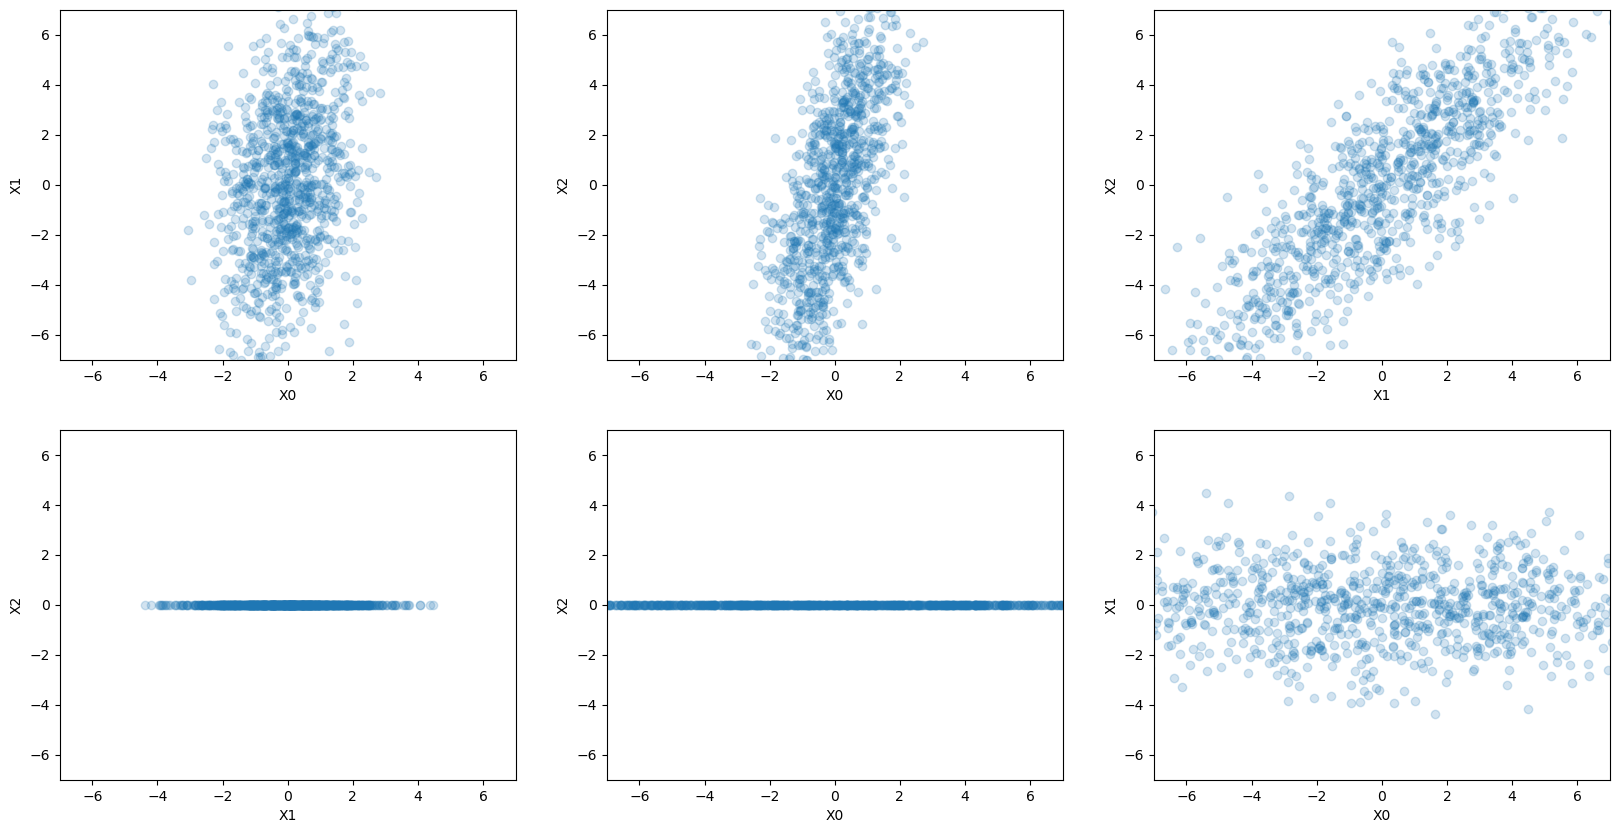

In [18]:
# draw each eigenvectors rescaled by the eigenvalues
fig, ax  = plt.subplots(2,3, figsize= (20,10))
#Redefine the data according to the new basis from the PCA
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
X_newbasis = np.dot(X,eigv_svd)
'''OBSERVATION --> there has been a permutation of columns. Moreover 2 components have been rescaled'''

ax[0,0].scatter(X[:, 0], X[:, 1], alpha=0.2) #x0, x1
ax[0,0].set_xlabel("X0")
ax[0,0].set_ylabel("X1")
ax[0,0].set_xlim([-7, 7])
ax[0,0].set_ylim([-7, 7])
    
    
ax[0,1].scatter(X[:, 0], X[:, 2], alpha=0.2) #x0, x2
ax[0,1].set_xlabel("X0")
ax[0,1].set_ylabel("X2")
ax[0,1].set_xlim([-7, 7])
ax[0,1].set_ylim([-7, 7])

ax[0,2].scatter(X[:, 1], X[:, 2], alpha=0.2) #x1, x2
ax[0,2].set_xlabel("X1")
ax[0,2].set_ylabel("X2")
ax[0,2].set_xlim([-7, 7])
ax[0,2].set_ylim([-7, 7])

ax[1,2].scatter(X_newbasis[:, 0], X_newbasis[:, 1], alpha=0.2) #x0, x1
ax[1,2].set_xlabel("X0")
ax[1,2].set_ylabel("X1")
ax[1,2].set_xlim([-7, 7])
ax[1,2].set_ylim([-7, 7])     


ax[1,1].scatter(X_newbasis[:, 0], X_newbasis[:, 2], alpha=0.2) #x0, x2
ax[1,1].set_xlabel("X0")
ax[1,1].set_ylabel("X2")
ax[1,1].set_xlim([-7, 7])
ax[1,1].set_ylim([-7, 7])    
    
ax[1,0].scatter(X_newbasis[:, 1], X_newbasis[:, 2], alpha=0.2) #x1, x2
ax[1,0].set_xlabel("X1")
ax[1,0].set_ylabel("X2")
ax[1,0].set_xlim([-7, 7])
ax[1,0].set_ylim([-7, 7])


[[-1.76187562e+00 -2.04571443e+00  6.25304691e-17]
 [-1.56319885e+00  1.82080290e+00 -1.11724165e-16]
 [-2.84845405e+00  1.97682565e-01 -8.31208991e-17]
 ...
 [-3.24966630e+00  1.69690900e+00 -2.11995147e-16]
 [-2.13363376e+00  9.28801558e-01 -1.86209978e-16]
 [-6.91387674e+00  9.84851520e-01 -5.68896769e-16]]


(-7.0, 7.0)

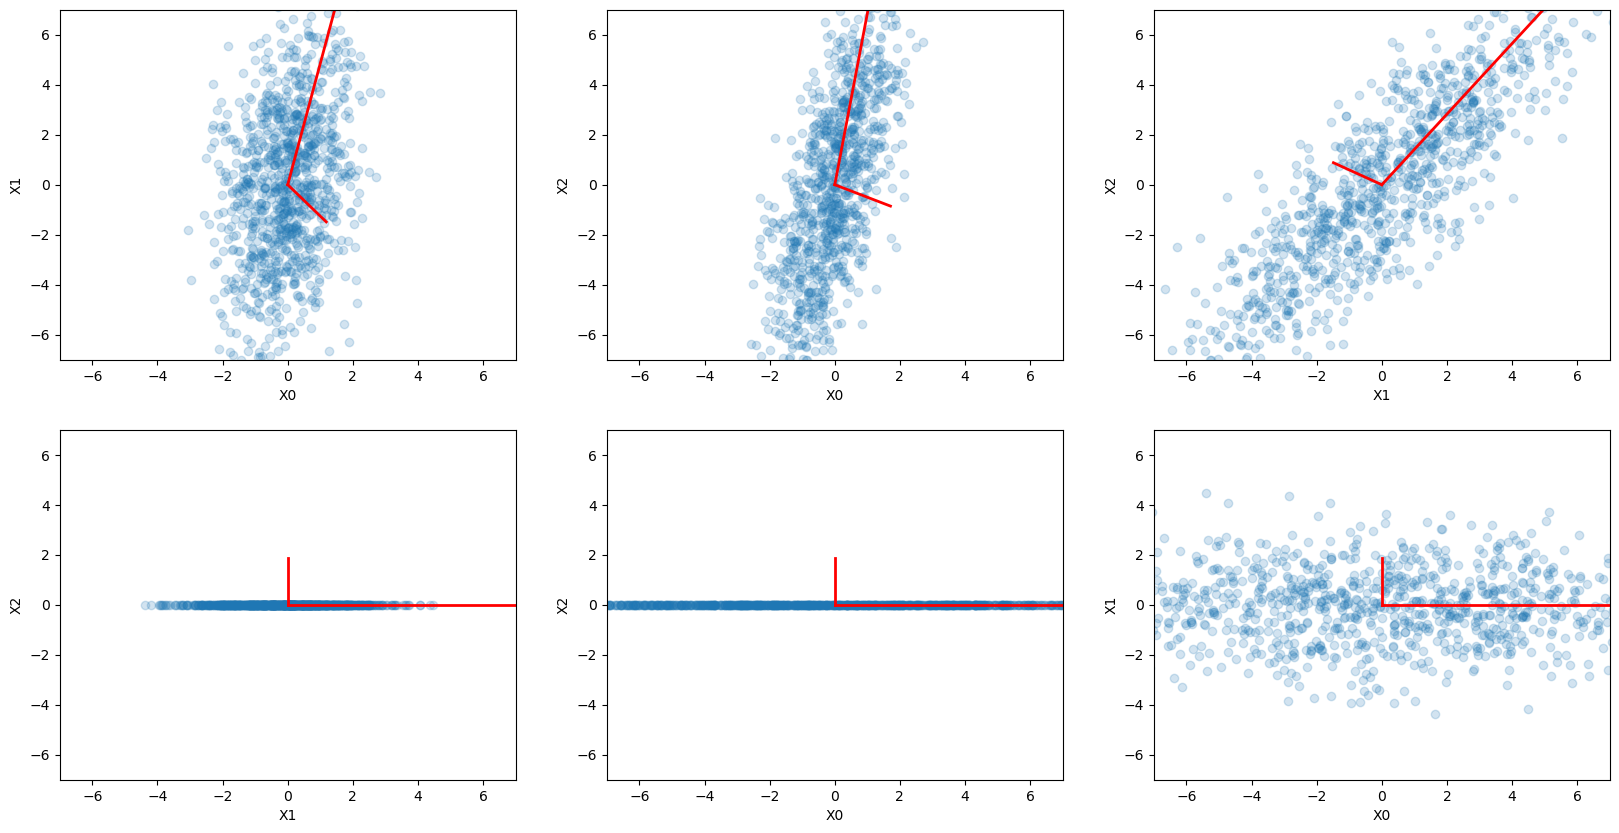

In [21]:
# draw each eigenvectors rescaled by the eigenvalues
fig, ax  = plt.subplots(2,3, figsize= (20,10))
#Redefine the data according to the new basis from the PCA
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
X_newbasis = np.dot(X,eigv_svd)
print(X_newbasis)

'''OBSERVATION --> there has been a permutation of columns. Moreover 2 components have been rescaled'''
scale_factor = 1
ax[0,0].scatter(X[:, 0], X[:, 1], alpha=0.2) #x0, x1
ax[0,0].set_xlabel("X0")
ax[0,0].set_ylabel("X1")
for li, vi in zip(l_svd,eigv_svd.T):
    ax[0,0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li* vi[1]], 'r-', lw=2)
ax[0,0].set_xlim([-7, 7])
ax[0,0].set_ylim([-7, 7])
    
    
scale_factor = 1
ax[0,1].scatter(X[:, 0], X[:, 2], alpha=0.2) #x0, x2
ax[0,1].set_xlabel("X0")
ax[0,1].set_ylabel("X2")

for li, vi in zip(l_svd,eigv_svd.T[::2]):
    ax[0,1].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li* vi[2]], 'r-', lw=2)
ax[0,1].set_xlim([-7, 7])
ax[0,1].set_ylim([-7, 7])

scale_factor = 1
ax[0,2].scatter(X[:, 1], X[:, 2], alpha=0.2) #x1, x2
ax[0,2].set_xlabel("X1")
ax[0,2].set_ylabel("X2")
for li, vi in zip(l_svd,eigv_svd.T):
    ax[0,2].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li* vi[2]], 'r-', lw=2)
    ax[0,2].set_xlim([-7, 7])
ax[0,2].set_ylim([-7, 7])

scale_factor = 0.9
ax[1,2].scatter(X_newbasis[:, 0], X_newbasis[:, 1], alpha=0.2) #x0, x1
ax[1,2].set_xlabel("X0")
ax[1,2].set_ylabel("X1")
for li, vi in zip(l_svd,np.dot(eigv_svd.T, eigv_svd)[:2]): 
    ax[1,2].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li* vi[1]], 'r-', lw=2)
ax[1,2].set_xlim([-7, 7])
ax[1,2].set_ylim([-7, 7])     

scale_factor = 0.9
ax[1,1].scatter(X_newbasis[:, 0], X_newbasis[:, 2], alpha=0.2) #x0, x2
ax[1,1].set_xlabel("X0")
ax[1,1].set_ylabel("X2")
for li, vi in zip(l_svd,np.dot(eigv_svd.T, eigv_svd)[0::2]): 
    ax[1,1].plot([0, scale_factor * li *vi[0]], [0, scale_factor * li *vi[2]], 'r-', lw=2)
ax[1,1].set_xlim([-7, 7])
ax[1,1].set_ylim([-7, 7])    
    

scale_factor = 0.9
ax[1,0].scatter(X_newbasis[:, 1], X_newbasis[:, 2], alpha=0.2) #x1, x2
ax[1,0].set_xlabel("X1")
ax[1,0].set_ylabel("X2")
for li, vi in zip(l_svd,np.dot(eigv_svd.T, eigv_svd)[1:]):
    ax[1,0].plot([0, scale_factor * li * vi[1]], [0, scale_factor * li* vi[2]], 'r-', lw=2)
ax[1,0].set_xlim([-7, 7])
ax[1,0].set_ylim([-7, 7])


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [29]:
# add noise
X_with_noise = np.copy(X)
#noise should be represented by other 10 uncorrelated variables normally distributed
for j in range(10):
    noise = np.random.normal(loc=0, scale=1/20, size=X.shape[0])
    new_col = np.resize(noise, (n,1))
    X_with_noise = np.append(X_with_noise, new_col, axis=1)
    
print("Now X with noise has shape = (%d, %d)" % X_with_noise.shape)

#Repeat the PCA procedure and compare the results with what you have obtained before.
cov_noise = np.cov(X_with_noise,rowvar=False)
#l = eigenvalues, V = eigenvectors with eigendecomposition of the covariance matrix 
l_noise, V_noise = la.eig(cov_noise)
l_noise = np.real_if_close(l_noise)


print("\nEIGENDECOMPOSITION\neigenvalues:\n", l_noise,"\n\neigenvectors:")
for i in range(V_noise.shape[1]):
    print(V_noise[:,i], "\n")

#sorting
l_noise_index = np.argsort(l_noise)
l_noise_sorted = np.copy(l_noise)
V_noise_sorted = np.copy(V_noise)
for j in range(X_with_noise.shape[1]):    
    l_noise_sorted[j] = l_noise[l_noise_index[j]]
    for i in range(X_with_noise.shape[1]):
        V_noise_sorted[i,j] = V_noise[i,l_noise_index[j]]
print("\n")




#What percent of the total dataset's variability is explained by the principal components?
lambda_matrix_noise = np.diag(l_noise)
cov_noise_trace = cov_noise.trace()

#to compute the % of variability of each component -> I divide each eigenvalues by the trace of the covariance matrix 
#(but I can also divide it by the trace of the diagonal matrix built with the eigenvalues)
variabilities2 = np.zeros(X_with_noise.shape[1])
for j in range(X_with_noise.shape[1]):
    variabilities2[j] =  lambda_matrix_noise[j, j]/cov_noise_trace #I could also do l_sorted[0] / sum(l_sorted)
    print("component %d gets the %.16f%% of variability" % (j, variabilities2[j]))

    
minvar_ind2 = np.argmin(variabilities2)
print("\nI remove the component at index = %d" % minvar_ind)
print("eigenvalue to remove = ", l_noise[minvar_ind2])
print("eigenvector to remove = ", V_noise[:,minvar_ind2])


Now X with noise has shape = (1000, 13)

EIGENDECOMPOSITION
eigenvalues:
 [ 2.56101668e+01  2.09324278e+00 -2.39585779e-16  2.95313189e-03
  2.79579875e-03  2.20587098e-03  2.26000663e-03  2.33627620e-03
  2.37518266e-03  2.45317720e-03  2.54109666e-03  2.69058192e-03
  2.67686386e-03] 

eigenvectors:
[-1.18287021e-01 -5.73819899e-01 -8.10393941e-01 -2.21085724e-04
 -5.39853107e-05  1.02091431e-04  1.65684838e-05  2.76456892e-04
  5.63792375e-05 -3.82940398e-04  3.34041328e-04 -3.04216517e-04
 -2.66523422e-04] 

[-5.65099027e-01  7.09969898e-01 -4.20228156e-01  5.91829544e-04
 -2.13723104e-04  1.27016622e-03  1.17728772e-03 -1.25396341e-05
  2.25775187e-04  7.84441489e-05 -1.31359532e-03 -2.93020241e-03
 -6.05559820e-04] 

[ 8.16496581e-01  4.08248290e-01 -4.08248290e-01  1.79976460e-17
  1.60886010e-15 -1.90854900e-15 -1.33924890e-15  1.35136625e-15
 -8.54587994e-17 -1.36245195e-17  2.40954053e-15  2.78541788e-15
  1.00147363e-15] 

[-0.00073599  0.00076608 -0.0007059  -0.00271087  0.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [31]:
named = "data/magic04.data"
namen = "data/magic04.names"
#!cat "data/magic04.names"

with open(named) as d:
    df_only_values = pd.read_csv(named)
    df = pd.DataFrame(df_only_values.values, columns = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"])
    print(df)

Y = np.resize(df.values[:,range(df.shape[1]-1)], (df.values.size, df.shape[1]-1) ) #we don't consider the class
print("\nmatrix where each column represents a variable\n", Y)
print("\n# of variables = # of columns = ", Y.shape[1])
cov = np.cov(Y.astype(float),rowvar=False)
#l = eigenvalues, V = eigenvectors with eigendecomposition of the covariance matrix 
l, V = la.eig(cov)
l = np.real_if_close(l)

#show the results
print("\nEIGENDECOMPOSITION\neigenvalues:\n", l, "\neigenvectors:\n", V)

#perform PCA
#What percent of the total dataset's variability is explained by the principal components?
lambda_matrix = np.diag(l)
covtrace = cov.trace()

#to compute the % of variability of each component -> I divide each eigenvalues by the trace of the covariance matrix 
#(but I can also divide it by the trace of the diagonal matrix built with the eigenvalues)
variab = np.zeros(Y.shape[1])
for j in range(Y.shape[1]):
    variab[j] =  lambda_matrix[j, j]/covtrace 
    print("component %d gets the %.16f%% of variability" % (j, variab[j]))


        fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long fM3Trans  \
0       31.6036  11.7235  2.5185  0.5303  0.3773   26.2722   23.8238  -9.9574   
1       162.052  136.031  4.0612  0.0374  0.0187   116.741   -64.858  -45.216   
2       23.8172   9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633  -7.1513   
3       75.1362  30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525  21.8393   
4        51.624  21.1502  2.9085   0.242   0.134   50.8761   43.1887   9.8145   
...         ...      ...     ...     ...     ...       ...       ...      ...   
19014   21.3846   10.917  2.6161  0.5857  0.3934   15.2618   11.5245   2.8766   
19015   28.9452    6.702  2.2672  0.5351  0.2784   37.0816   13.1853  -2.9632   
19016   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562  -9.4662   
19017  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224 -63.8389   
19018  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558  31.4755   

        fAlpha     fDist cl